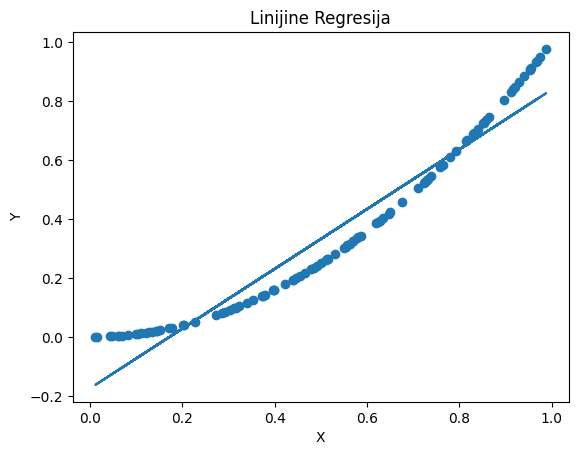

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.random.rand(100, 1)
y = X ** 2

model = LinearRegression()
model.fit(X, y)

plt.scatter(X,y)
plt.plot(X, model.predict(X))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linijine Regresija')
plt.show()

In [6]:
import pandas as pd 

df = pd.read_csv('autoscrap_1-200.csv')

kainos = df['k']
kainos.to_csv('kainos.csv')

C:\Users\ostap\AppData\Local\Temp\ipykernel_4812\1915988143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gamybos_metai'] = data['Gamybos_metai'].str.replace("-","")
C:\Users\ostap\AppData\Local\Temp\ipykernel_4812\1915988143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rida'] = data['Rida'].str.replace("km","")
C:\Users\ostap\AppData\Local\Temp\ipykernel_4812\1915988143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

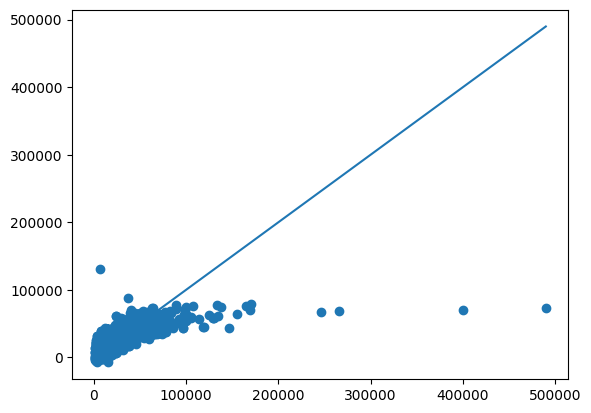

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
kainos = df['k']
data = df[['Variklis', 'Rida', 'Gamybos_metai' ]]

data['Gamybos_metai'] = data['Gamybos_metai'].str.replace("-","")
data['Rida'] = data['Rida'].str.replace("km","")
data['Rida'] = data['Rida'].str.replace(" ","")
data['Rida'] = data['Rida'].str.replace("Nenurodyta","1")
# data['Variklis'] = data['Variklis'].str.split(".,")
data['kW'] = data['Variklis'].str.extract(r'(\d+) kW')[0]


reikalinga_data = data[['kW', 'Rida', 'Gamybos_metai']]

reikalinga_data.to_csv('data.csv')

X_train, X_test, y_train, y_test = train_test_split(reikalinga_data, kainos)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()